# <div align="center">------------------------ Case Study on Data Analytics ------------------------

#### Link to CSV File used in this project:
https://docs.google.com/spreadsheets/d/198PIIQTtwFPcNo52GfIvgLw7eqbcUN4a/edit?usp=sharing&ouid=113385597075676463184&rtpof=true&sd=true

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 1. Data Preparation

In [ ]:
df=pd.read_csv('CerealData.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


#### Overview of Data

In [ ]:
def overview():
    df=pd.read_csv('CerealData.csv')
    print("\033[1;3mThe first 5 rows of data are:\n \033[0m")
    print(df.head)
    print("\033[1;3m\n\n\nDataset has {} rows and {} columns \033[0m".format(df.shape[0], df.shape[1]))
    print("\033[1;3m\n\n\nDatatype: \n\033[0m")
    print(df.dtypes)
    print("\033[1;3m\n\n\nThe number of null values for each column are: \n\033[0m")
    print(df.isnull().sum())
    print("\033[1;3m\n\n\nData summary: \n\033[0m")
    print(df.describe())
    print("\033[1;3m\n\n\nNumber of unique values for each column: \n\033[0m")
    print(df.nunique())
    return df

df = overview()

The first 5 rows of data are:
 
<bound method NDFrame.head of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       11

### Types of Data
**Qualitative Data**<br>
Some features describe qualities, or characteristics of the entities being observed. Qualitative data is categorical in nature as it assigns our observations to certain group. In our cereal dataset, there are 3 features, name, mfr and type, they are of type object and if we checkout its contents are text/string.<br><br>

**Nominal Data**<br>
'name', 'mfr' and 'type' all of them are Nominal Data. They do not indicate measurement or quantity. We cannot do mathematical operations on them. Also there is no order among those values so they cannot be Ordinal Data (for example levels of Beginner, Intermedieate or advanced courses)<br>

Feature 'name' acts as on identifier for each row or a cereal. Feature 'mfr' is name of company that manufactures that cereal. Feature 'type' indicates the type of cereal.<br><br>

**Ordinal data**<br>
Feature 'shelf', though of type int64, has property of ordinal data i.e there is order in its values. Product can be placed on shelf no (1,2,3). If we assume, customer is more likey to pick up product kept at top shelf. and Top shelf =3 , Middle =2 and Bottom =1.<br><br>

**Frequency distribution**<br>
Thus we can classify cereals by mfr, by type, and by shelf. We can count number of times a particular value occurs. Arrangment of data in the form of a pair - the value and number of its occurence is called as Frequency distribution.

#### Single Categorical Variable

In [ ]:
def single_cat():
    df=pd.read_csv('CerealData.csv')
    print("\033[1;3mTypes of Cereals: \033[0m")
    print(df['type'].unique())
    print(df['type'].unique().size)
    print("\033[1;3m\nNumber of Hot Cereals: \033[0m")
    print(df['name'][df['type'] == 'C'].count())
    print("\033[1;3m\nNumber of Cold Cereals: \033[0m")
    print(df['name'][df['type'] == 'H'].count())

    print("\033[1;3m\nTypes of manufacturer of cereals: \033[0m")
    print(df['mfr'].unique())
    print(df['mfr'].unique().size)
    print("\033[1;3m\nHow many cereals of each manufacturer: \033[0m")
    print("Nabisco(N) : ", end = "");print(df['name'][df['mfr'] == 'N'].count())
    print("Quaker Oats(Q) : ", end = "");print(df['name'][df['mfr'] == 'Q'].count())
    print("Kelloggs(K) : ", end = "");print(df['name'][df['mfr'] == 'K'].count())
    print("Ralston Purina(R) : ", end = "");print(df['name'][df['mfr'] == 'R'].count())
    print("General Mills(G) : ", end = "");print(df['name'][df['mfr'] == 'G'].count())
    print("Post(P) : ", end = "");print(df['name'][df['mfr'] == 'P'].count())
    print("American Home Food Products(A) : ", end = "");print(df['name'][df['mfr'] == 'A'].count())

    print("\033[1;3m\nHow many 'shelf' cereals are placed on: \033[0m")
    print(df['shelf'].unique())
    print(df['shelf'].unique().size)
    print("1 : ",end = "");print(df['name'][df['shelf'] == 1].count())
    print("2 : ",end = "");print(df['name'][df['shelf'] == 2].count())
    print("3 : ",end = "");print(df['name'][df['shelf'] == 3].count())

    return df

df = single_cat()

Types of Cereals: 
['C' 'H']
2

Number of Hot Cereals: 
74

Number of Cold Cereals: 
3

Types of manufacturer of cereals: 
['N' 'Q' 'K' 'R' 'G' 'P' 'A']
7

How many cereals of each manufacturer: 
Nabisco(N) : 6
Quaker Oats(Q) : 8
Kelloggs(K) : 23
Ralston Purina(R) : 8
General Mills(G) : 22
Post(P) : 9
American Home Food Products(A) : 1

How many 'shelf' cereals are placed on: 
[3 1 2]
3
1 : 20
2 : 21
3 : 36


### Segregating data columns into Categorical and Numerical Parts

#### Categorical Dataframe

In [ ]:
cat_df = pd.DataFrame({'name': df['name'], 'mfr': df['mfr'], 'shelf': df['shelf']}, columns = ['name','mfr', 'shelf'])
print('\ncat_df.shape--------->')
print(cat_df.shape)
print('\ncat_df.info()--------->')
print(cat_df.info())
print('\ncat_df.describe()--------->')
print(cat_df.describe())
print('\ncat_df.head()--------->')
print(cat_df.head())


cat_df.shape--------->
(77, 3)

cat_df.info()--------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    77 non-null     object
 1   mfr     77 non-null     object
 2   shelf   77 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ KB
None

cat_df.describe()--------->
           shelf
count  77.000000
mean    2.207792
std     0.832524
min     1.000000
25%     1.000000
50%     2.000000
75%     3.000000
max     3.000000

cat_df.head()--------->
                        name mfr  shelf
0                  100% Bran   N      3
1          100% Natural Bran   Q      3
2                   All-Bran   K      3
3  All-Bran with Extra Fiber   K      3
4             Almond Delight   R      3


#### Numerical Dataframe

In [ ]:
num_df = pd.DataFrame({'name':df['name'], 'calories':df['calories'], 'protein': df['protein'], 'fat': df['fat'],
                    'sugars': df['sugars'], 'sodium':df['sodium']/1000, 'potass': df['potass']/1000,
                       'rating': df['rating']}, columns = ['name','calories', 'protein','fat','sugars','sodium','potass'])
num_df.head()

,name,calories,protein,fat,sugars,sodium,potass
0,100% Bran,70,4,1,6,0.130,0.280
1,100% Natural Bran,120,3,5,8,0.015,0.135
2,All-Bran,70,4,1,5,0.260,0.320
3,All-Bran with Extra Fiber,50,4,0,0,0.140,0.330
4,Almond Delight,110,2,2,8,0.200,-0.001


## 2. Data Exploration

### Nutrients Value of Cereals Shelf-wise

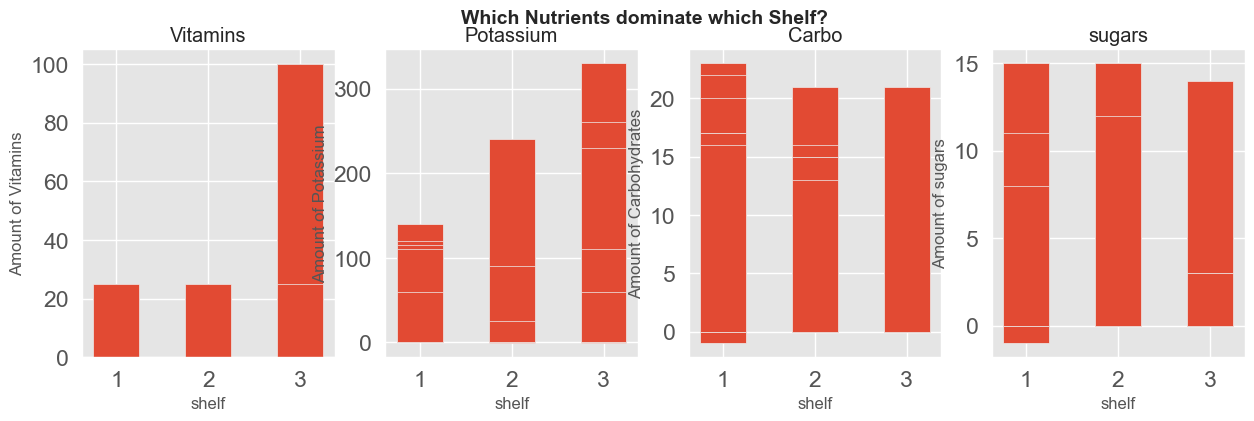

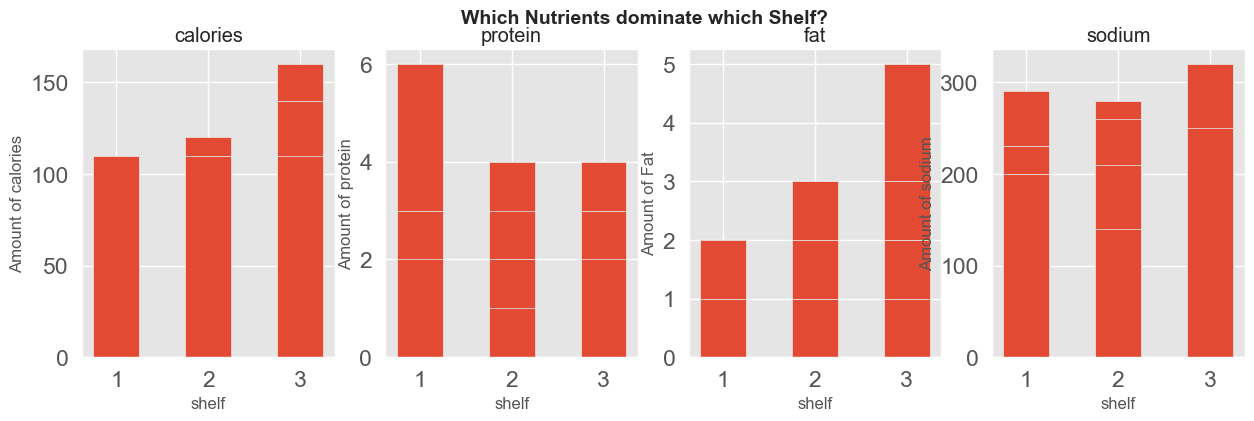

In [ ]:
plt.style.use('ggplot')
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
x = df['shelf']
y = df['vitamins']
ax0.bar(x, y, width=0.5, align='center')
ax0.set(title = 'Vitamins', xlabel='shelf' , ylabel = 'Amount of Vitamins')

x = df['shelf']
y = df['potass']
ax1.bar(x, y, width=0.5, align='center')
ax1.set(title = 'Potassium', xlabel='shelf' , ylabel = 'Amount of Potassium')

x = df['shelf']
y = df['carbo']
ax2.bar(x, y, width=0.5, align='center')
ax2.set(title = 'Carbo', xlabel='shelf' , ylabel = 'Amount of Carbohydrates')

x = df['shelf']
y = df['sugars']
ax3.bar(x, y, width=0.5, align='center')
ax3.set(title = 'sugars', xlabel='shelf' , ylabel = 'Amount of sugars')

fig.suptitle('Which Nutrients dominate which Shelf?', fontsize=14, fontweight='bold');

plt.style.use('ggplot')
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

x = df['shelf']
y = df['calories']
ax0.bar(x, y, width=0.5, align='center')
ax0.set(title = 'calories', xlabel='shelf' , ylabel = 'Amount of calories')

x = df['shelf']
y = df['protein']
ax1.bar(x, y, width=0.5, align='center')
ax1.set(title = 'protein', xlabel='shelf' , ylabel = 'Amount of protein')

x = df['shelf']
y = df['fat']
ax2.bar(x, y, width=0.5, align='center')
ax2.set(title = 'fat', xlabel='shelf' , ylabel = 'Amount of Fat')

x = df['shelf']
y = df['sodium']
ax3.bar(x, y, width=0.5, align='center')
ax3.set(title = 'sodium', xlabel='shelf' , ylabel = 'Amount of sodium')

fig.suptitle('Which Nutrients dominate which Shelf?', fontsize=14, fontweight='bold');

**Observation**<br>
1. **Vitamins and Potassium** are present in higher quantities in Cereals placed on **Shelf 3**
2. There seems to be **almost equal amount** of **Sugars and Carbohydrates** in Cereals placed on all 3 Shelves
3. **Calories and Fat** are present in **higher quantities** in Cereals placed on **Shelf 3**
4. **Proteins** are present in **higher quantities** in Cereals placed on **Shelf 1**
5. There is **not much difference** in **amounts of Sodium** in Cereals placed on **all 3 Shelves**

###  Frequency distribution of Single Categorical Variable

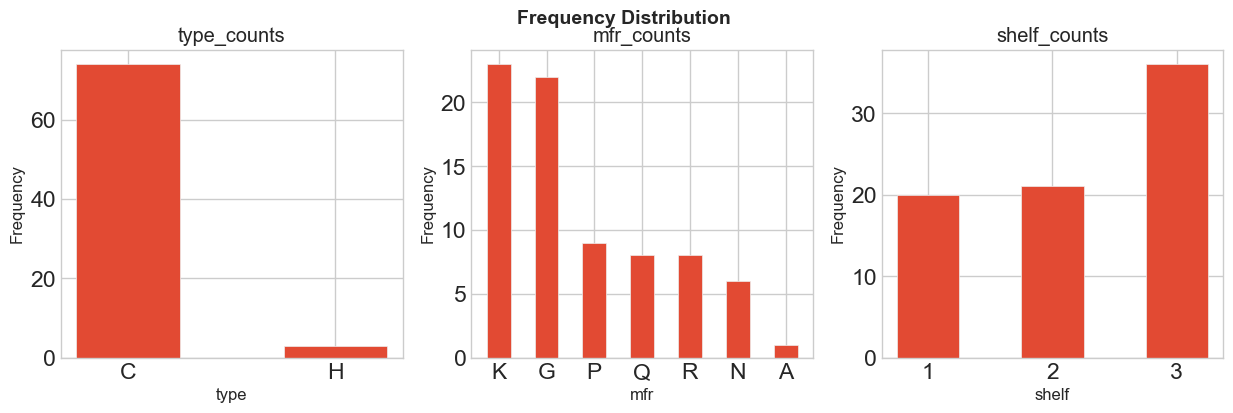

In [ ]:
data = pd.Series([1, 2, 3, 4, 4, 3, 4])
data.value_counts() #how many times each value occurs
data.keys()
list(data.items())
type_counts = df['type'].value_counts()
type_counts.index.values # array of index of Series

mfr_counts = df['mfr'].value_counts()
mfr_counts
mfr_counts.index.values # array of index of Series
mfr_counts.values # array of value of Series

shelf_counts = df['shelf'].value_counts()
shelf_counts
shelf_counts.index.values # array of index of Series
shelf_counts.values # array of value of Series

plt.style.use('seaborn-whitegrid')
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax0.bar(type_counts.index.values, type_counts.values, width=0.5, align='center')
ax0.set(title = 'type_counts', xlabel='type' , ylabel = 'Frequency')

ax1.bar(mfr_counts.index.values, mfr_counts.values, width=0.5, align='center')
ax1.set(title = 'mfr_counts', xlabel='mfr' , ylabel = 'Frequency')

ax2.bar(shelf_counts.index.values, shelf_counts.values, width=0.5, align='center')
ax2.set(title = 'shelf_counts', xlabel='shelf' , ylabel = 'Frequency')

fig.suptitle('Frequency Distribution', fontsize=14, fontweight='bold');

**Observations**
1. Majority of cereals are of type cold
2. Most of cereals are made by General Mills and Kelloggs
3. Majority of cereals are placed on Top shelf(3), and almost equal number of cereals are placed on shelf(2,1) which is equal to more than half of the number of Shelf(3)

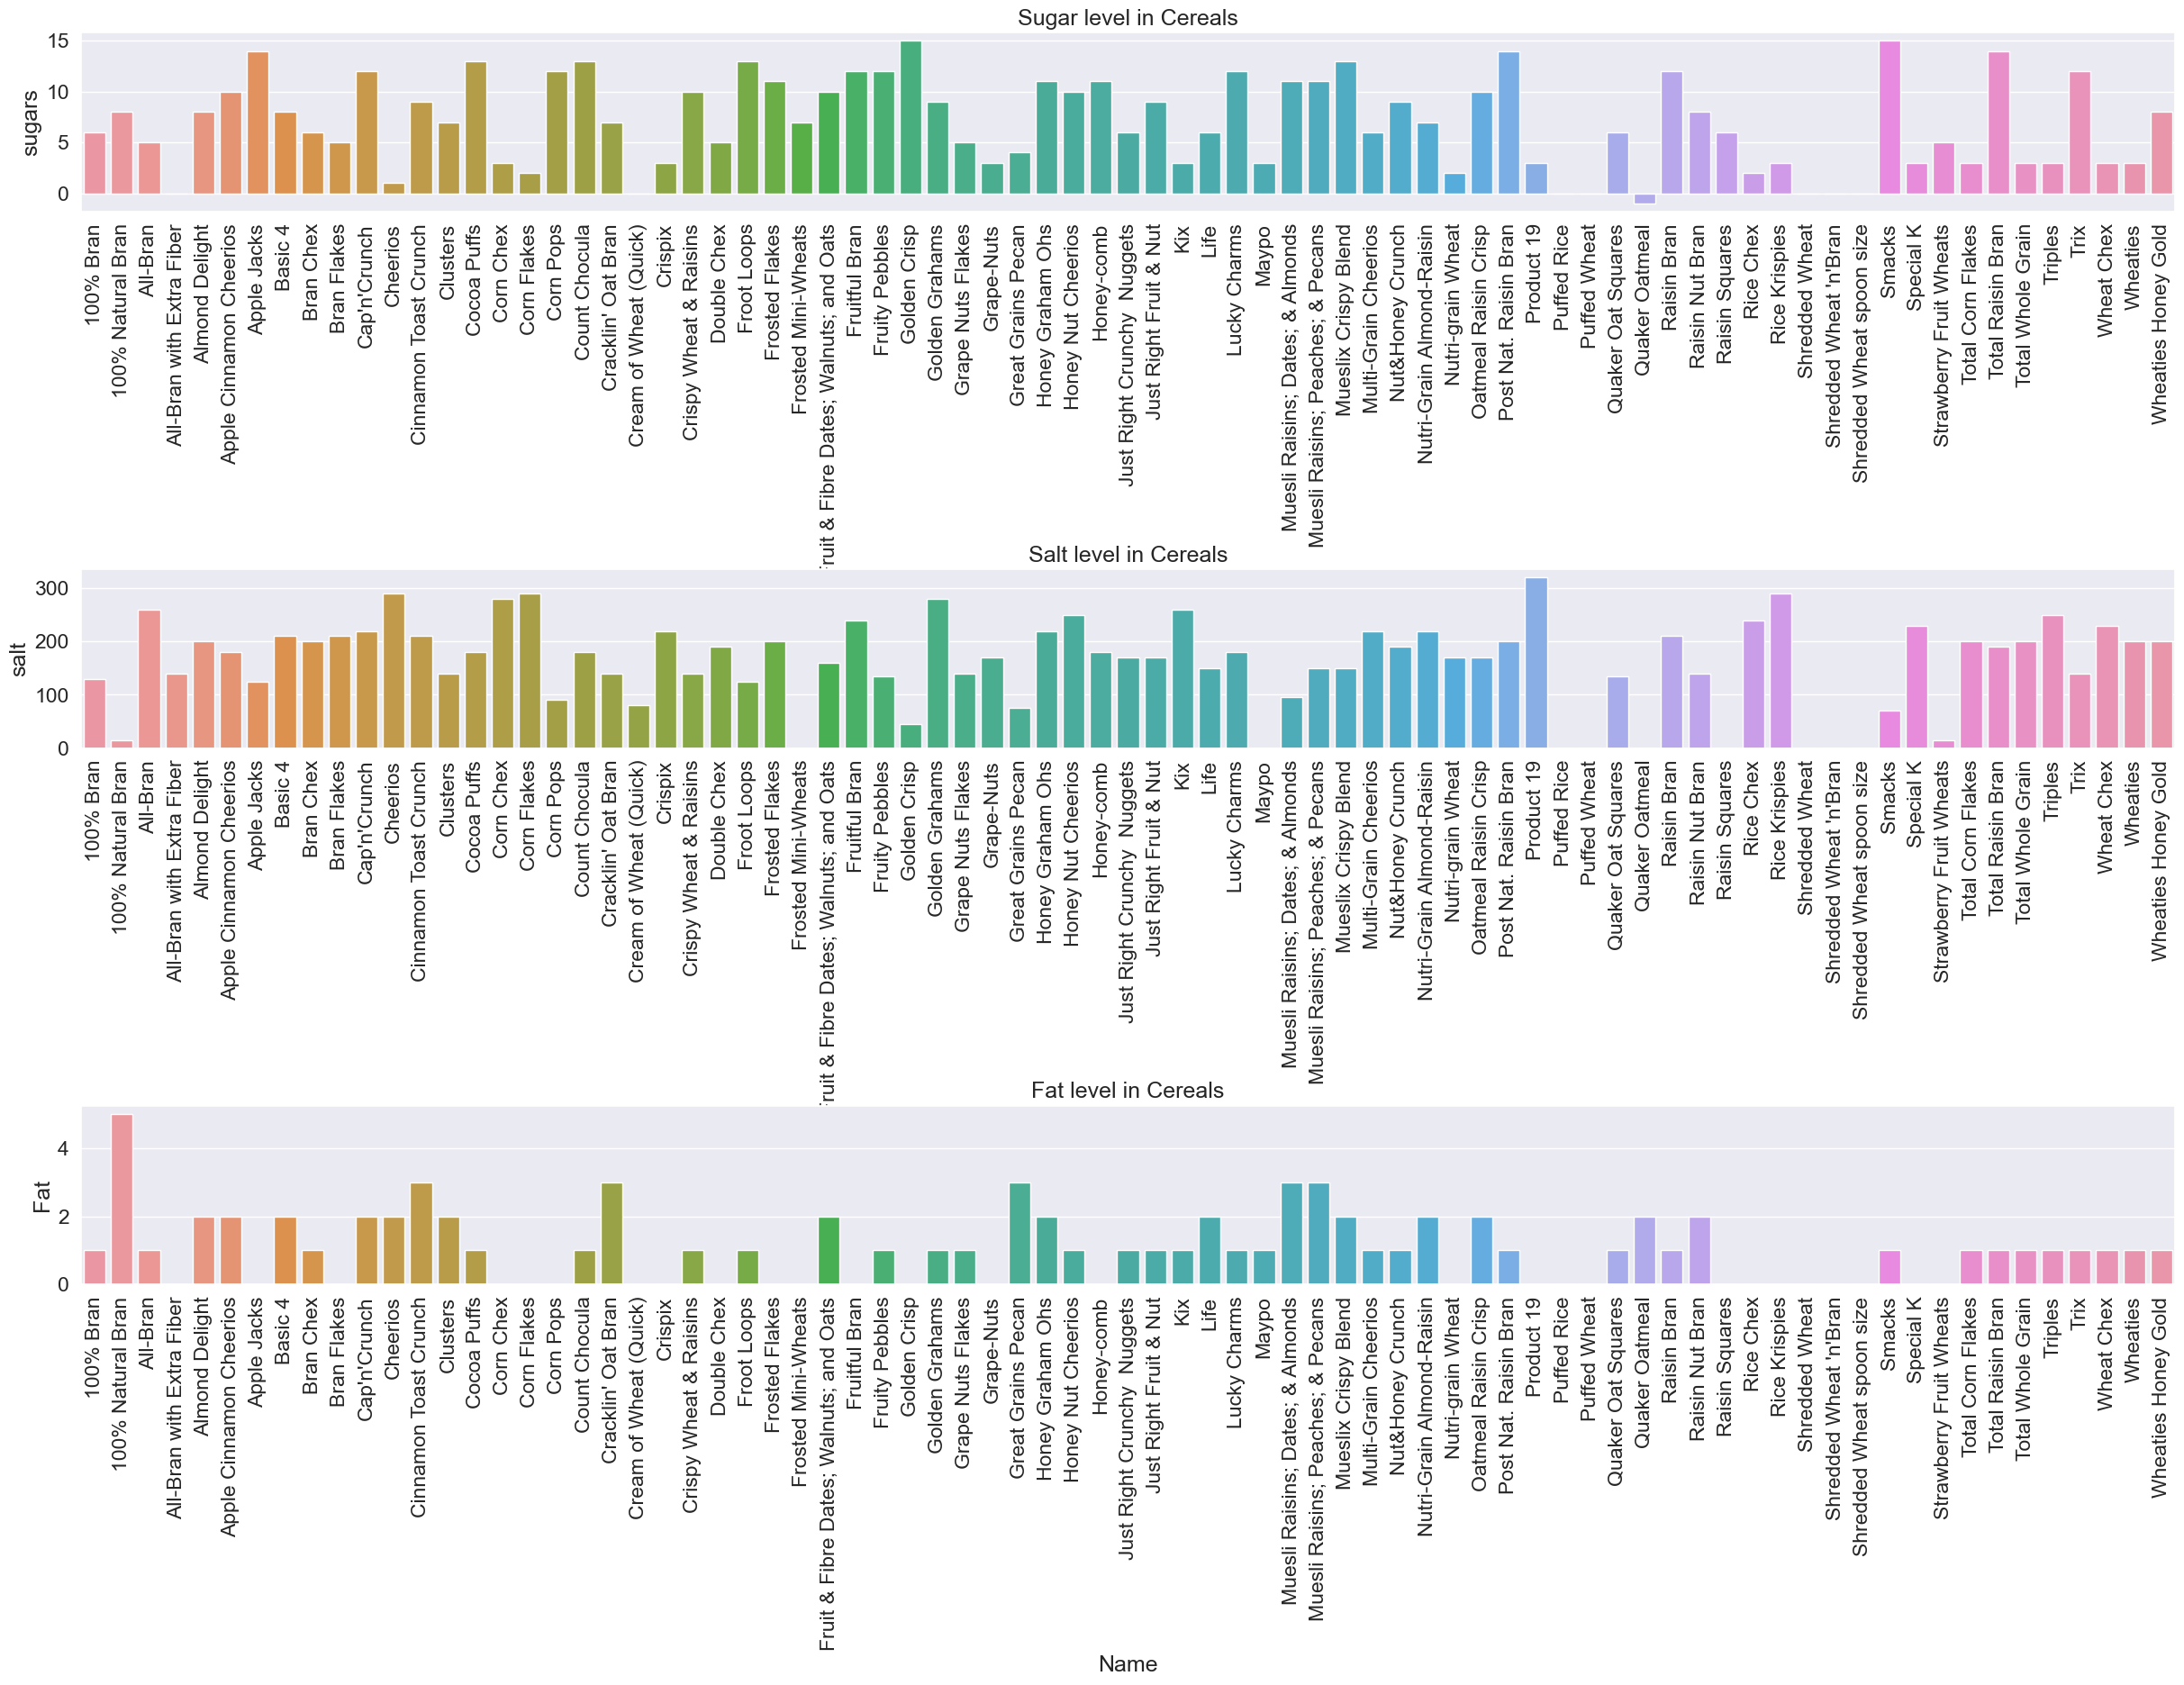

In [ ]:
plt.figure(figsize = (30,10))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)

plt.subplot(311)

ax = sns.barplot(x='name', y='sugars', data=df)
ax.set_xticklabels(df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='sugars')
ax.set_title('Sugar level in Cereals')

plt.subplot(312)
ax = sns.barplot(x='name', y='sodium', data=df)
ax.set_xticklabels(df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='salt')
ax.set_title('Salt level in Cereals')

plt.subplot(313)
ax = sns.barplot(x='name', y='fat', data=df)
ax.set_xticklabels(df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='Fat')
ax.set_title('Fat level in Cereals')

plt.subplots_adjust(hspace = 2.0, top = 1.5)

plt.show()

### Side-by-side boxplot comparing the consumer rating of hot vs. cold cereals

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='rating'>

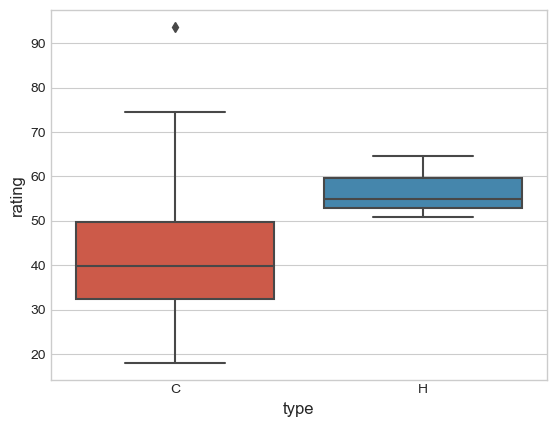

In [ ]:
import seaborn as sns
sns.boxplot(df.type,df.rating)

### Correlation Matrix

<AxesSubplot:>

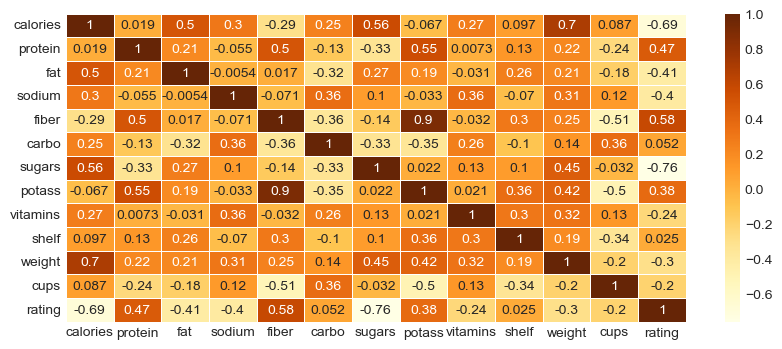

In [ ]:
corr = df.corr(method='pearson')
fig = plt.subplots(figsize = (10, 4))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlOrBr',annot=True, linewidth=0.5)

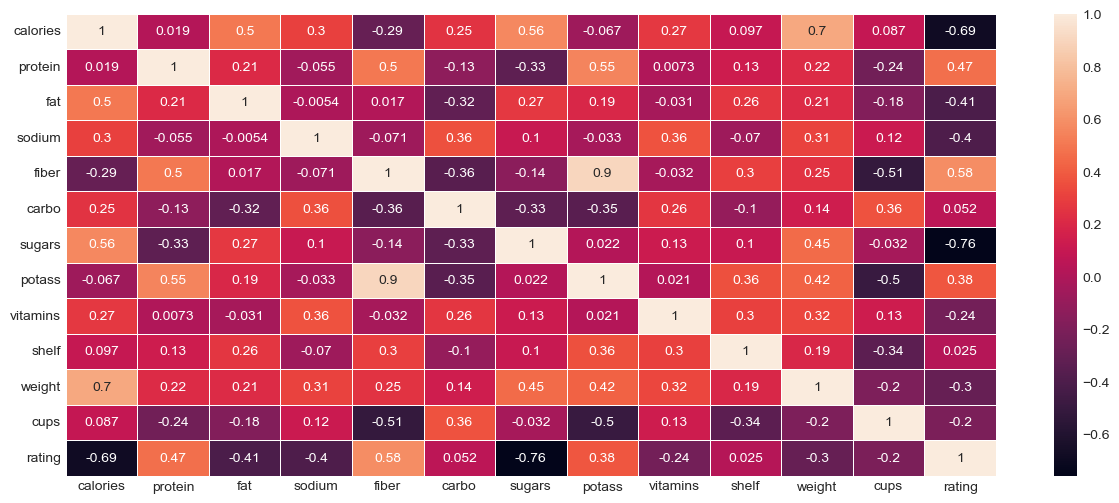

In [ ]:
df = pd.read_csv("CerealData.csv")
plt.figure(figsize=(15,6))

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, linewidth=0.5)
plt.show()

**Observation**
1. We observed strong positive correlation between
- **potassium** and **ratings**
- **fiber** and **ratings**
- **protein** and **ratings**
2. We observed strong negative correlation between
- **calories** and **ratings**
- **fat** and **ratings**
- **sodium** and **ratings**
- **sugars** and **ratings**

# 3. Data Modelling

### Linear Regression Model

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Rating vs. Calories, Fiber')

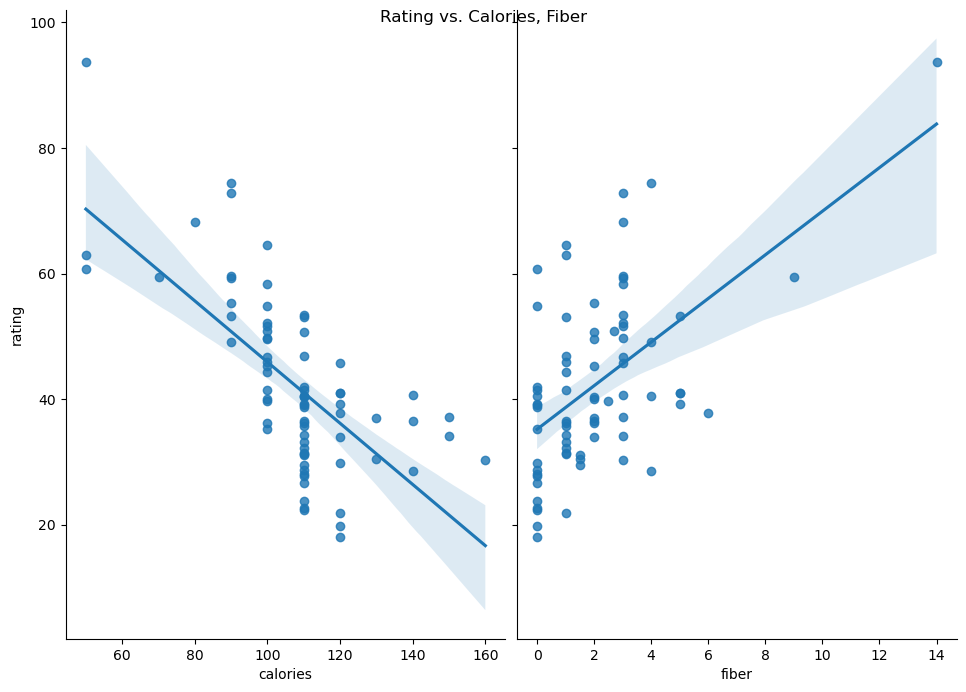

In [ ]:
import seaborn as sns
linear = sns.pairplot(df, x_vars=['calories','fiber'], y_vars='rating',size=7, aspect=0.7, kind='reg')
linear.fig.suptitle('Rating vs. Calories, Fiber')

In [ ]:
# Use label encoder on categorical data
le = LabelEncoder()

# Implementing LE on mfr
le.fit(df.mfr.drop_duplicates())
df.mfr = le.transform(df.mfr)

# Implementing LE on type
le.fit(df.type.drop_duplicates())
df.type = le.transform(df.type)

In [ ]:
# Creating training and testing dataset
y = df['rating']
X = df.drop(['rating', 'name'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))


0.9999999999999996


# <div align="center">Thank you!